In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the train and test data into respective pandas dataframe

In [3]:
train_data = pd.read_csv("/kaggle/input/students-drop-out-prediction/train.csv")
test_data = pd.read_csv("/kaggle/input/students-drop-out-prediction/test.csv")

#### Checking out the number of rows and columns in the train and test data

In [4]:
print("Training Data's Shape is {}".format(train_data.shape))
train_data.head()

Training Data's Shape is (3796, 43)


,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [5]:
print("Test Data's Shape is {}".format(test_data.shape))
test_data.head()

Test Data's Shape is (1628, 42)


,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,9,90,15,121,1,8,23,114,256,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,1,7,123,14,126,1,5,19,3,40,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,2,3,6,10,102,1,1,16,181,168,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,3,6,10,148,1,1,16,110,278,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,4,3,6,10,148,1,1,16,1,168,...,7.6,2.6,0.32,7,97,25,30,18,52,0


#### Checking the datatypes of various features

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

#### Checking if there are any missing values in any of the features

In [7]:
train_data.isnull().sum()

id       0
v_21     0
v_32     0
v_15     0
v_4      0
v_1      0
v_8      0
v_12     0
v_25     0
v_20     0
v_18     0
v_3      0
v_11     0
v_14     0
v_26     0
v_27     0
v_30     0
v_9      0
v_31     0
v_28     0
v_13     0
v_33     0
v_17     0
v_19     0
v_29     0
v_23     0
v_24     0
v_10     0
v_5      0
v_6      0
v_22     0
v_0      0
v_7      0
v_2      0
v_16     0
v_34     0
v_35     0
v_36     0
v_37     0
v_38     0
v_39     0
v_40     0
label    0
dtype: int64

#### Getting an overview of the descriptive statistics of the features

In [8]:
train_data.describe()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,...,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,1897.500000,4.817439,70.825606,11.609062,99.329294,0.911486,3.436249,18.970495,97.203372,166.138567,...,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,1095.955139,6.166860,56.110329,2.576362,45.017380,0.284079,4.577644,15.010042,79.213308,103.121322,...,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,0.000000,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,...,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,948.750000,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,...,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,1897.500000,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,...,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,2846.250000,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,...,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,3795.000000,61.000000,176.000000,25.000000,176.000000,1.000000,25.000000,179.000000,289.000000,322.000000,...,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


#### All the features present in the training data

In [9]:
train_data.columns

Index(['id', 'v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25',
       'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9',
       'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_29', 'v_23', 'v_24',
       'v_10', 'v_5', 'v_6', 'v_22', 'v_0', 'v_7', 'v_2', 'v_16', 'v_34',
       'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40', 'label'],
      dtype='object')

#### Trying to get a sense of which features might be categorical in nature

In [10]:
for columns in train_data.columns:
    print('Number of unique values in column {} is {}'.format(columns, len(train_data[columns].unique())))

Number of unique values in column id is 3796
Number of unique values in column v_21 is 22
Number of unique values in column v_32 is 84
Number of unique values in column v_15 is 17
Number of unique values in column v_4 is 98
Number of unique values in column v_1 is 2
Number of unique values in column v_8 is 25
Number of unique values in column v_12 is 37
Number of unique values in column v_25 is 80
Number of unique values in column v_20 is 98
Number of unique values in column v_18 is 95
Number of unique values in column v_3 is 124
Number of unique values in column v_11 is 2
Number of unique values in column v_14 is 2
Number of unique values in column v_26 is 2
Number of unique values in column v_27 is 2
Number of unique values in column v_30 is 2
Number of unique values in column v_9 is 2
Number of unique values in column v_31 is 48
Number of unique values in column v_28 is 2
Number of unique values in column v_13 is 22
Number of unique values in column v_33 is 26
Number of unique value

In [11]:
print('In v_1 : ', train_data['v_1'].unique())
print('In v_11 : ', train_data['v_11'].unique())
print('In v_14 : ', train_data['v_14'].unique())
print('In v_26 : ', train_data['v_26'].unique())
print('In v_27 : ', train_data['v_27'].unique())
print('In v_30 : ', train_data['v_30'].unique())
print('In v_9 : ', train_data['v_9'].unique())
print('In v_28 : ', train_data['v_28'].unique())

In v_1 :  [1 0]
In v_11 :  [1 0]
In v_14 :  [0 1]
In v_26 :  [0 1]
In v_27 :  [1 0]
In v_30 :  [0 1]
In v_9 :  [0 1]
In v_28 :  [0 1]


#### Checking whether data is imbalanced or not

In [12]:
train_data['label'].value_counts()

1    1863
0    1243
2     690
Name: label, dtype: int64

#### Finding if there is very high correlation among features

<AxesSubplot:>

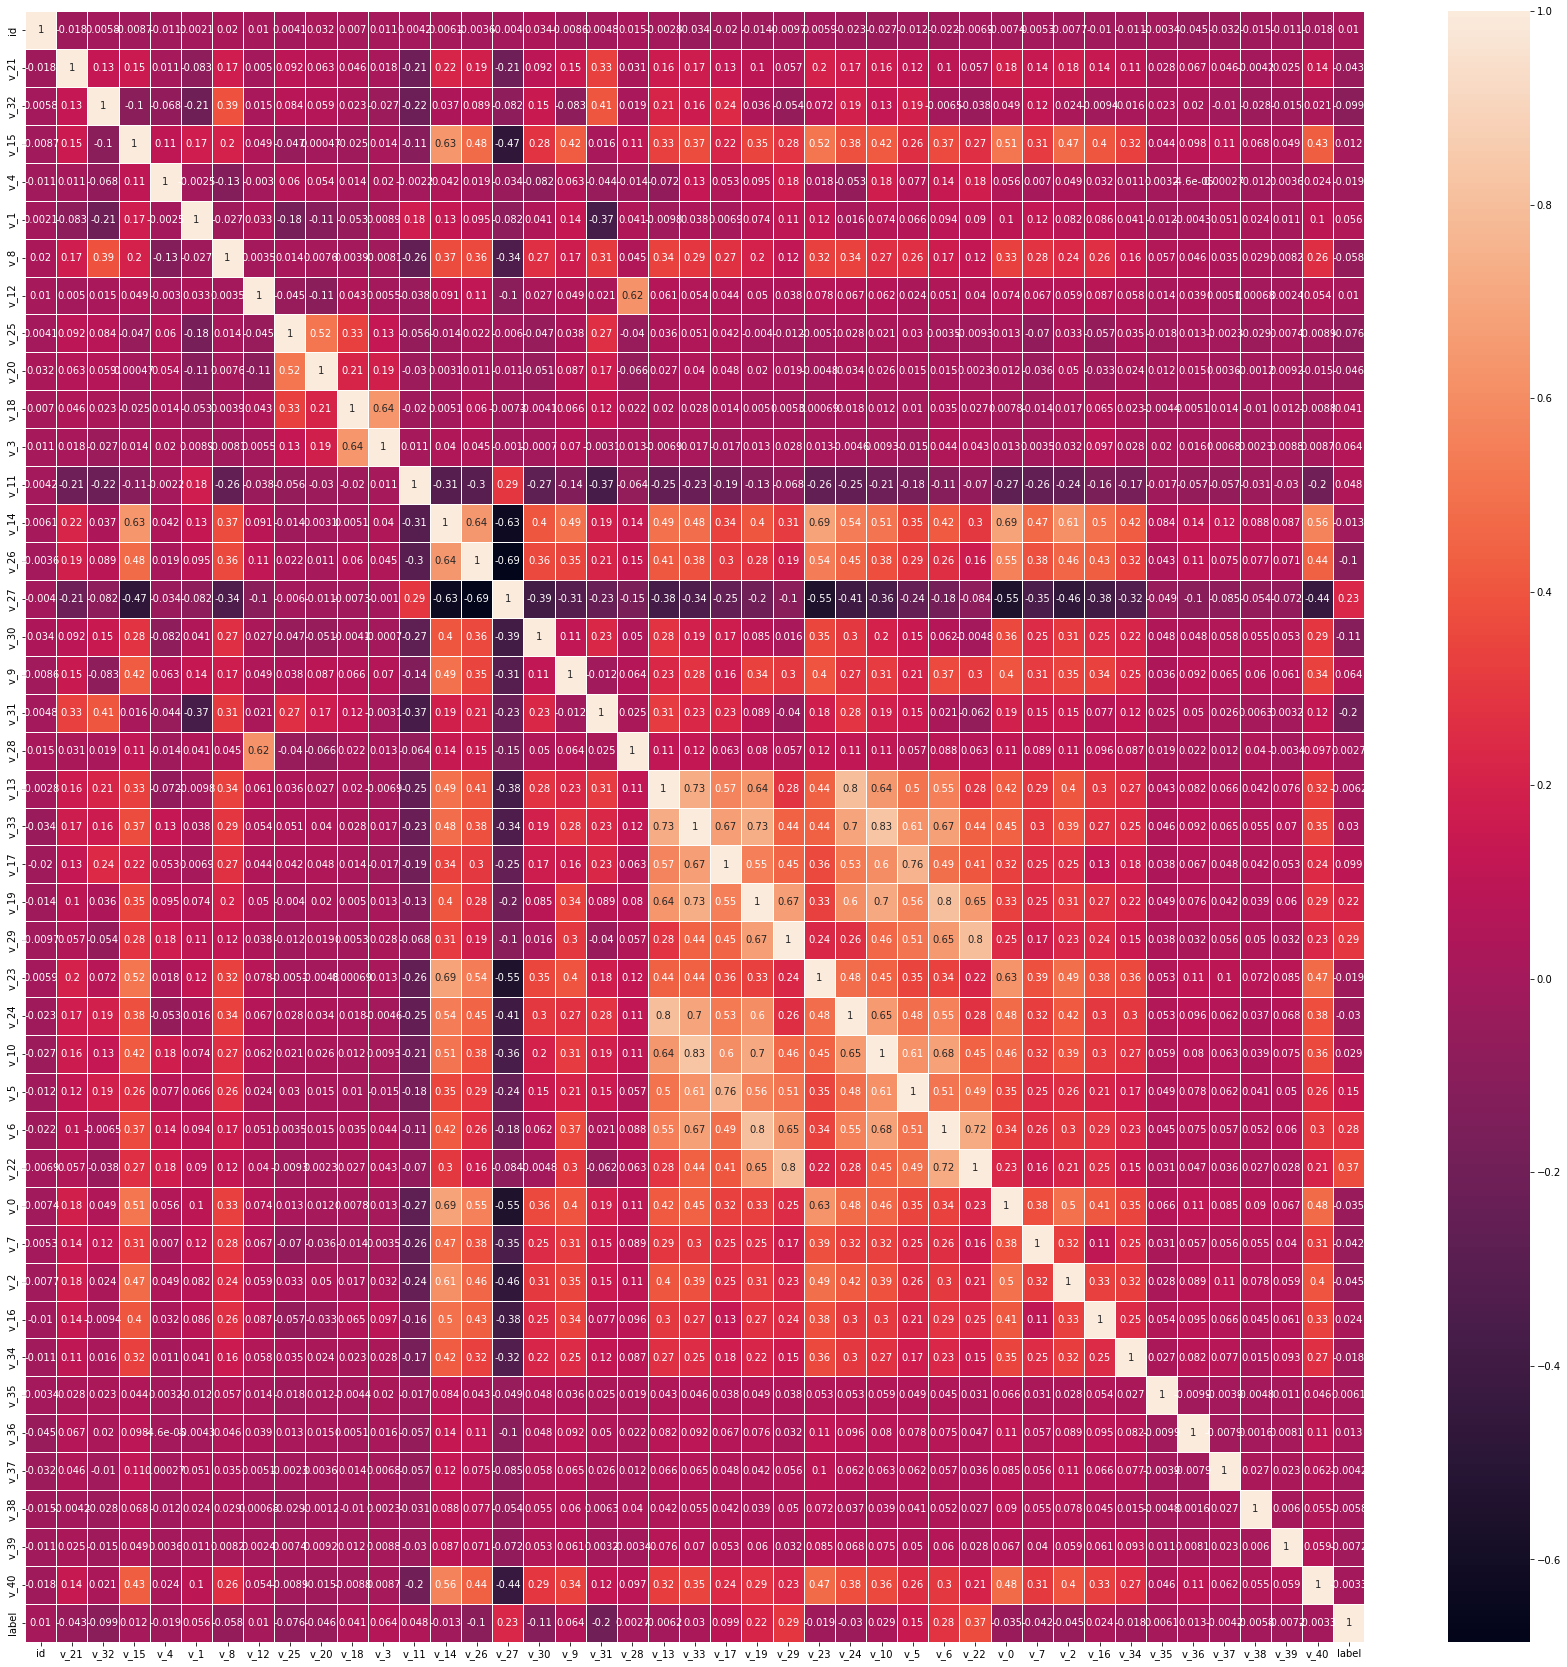

In [13]:
fig, ax = plt.subplots(figsize=(30,30))         
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)

#### Removing unwanted features and separating target lable from the data

In [14]:
X = train_data[['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25',
       'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9',
       'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_29', 'v_23', 'v_24',
       'v_10', 'v_5', 'v_6', 'v_22', 'v_0', 'v_7', 'v_2', 'v_16', 'v_34',
       'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40']]
y = train_data[['label']]

In [15]:
print(X.shape)
print(y.shape)

(3796, 41)
(3796, 1)


### Scaling the data for modeling

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler
ss = StandardScaler()
rs = RobustScaler()

X_standardized = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_standardized, index = X.index, columns = X.columns)
X_scaled.head()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,-0.294749,-1.155476,-0.236435,-0.984845,0.311624,-0.532276,-0.197927,-1.164142,-1.029395,-0.544365,...,0.440906,-0.930412,-0.014764,-1.237879,1.443223,1.392576,-1.655516,0.937116,-0.632603,-1.252232
1,0.516143,0.413069,0.151760,-0.762679,0.311624,0.123169,0.201858,-1.176768,0.066546,2.808169,...,0.733830,1.334686,1.825054,0.187872,-0.739069,0.722680,0.347407,1.217297,-0.231953,1.421048
2,-0.294749,1.696424,-0.624630,1.236812,0.311624,-0.532276,-0.197927,-1.214645,1.385555,-0.544365,...,-0.379281,-0.572765,0.380861,-1.237879,-1.455134,0.521711,-1.405151,0.656935,-0.098403,-0.488438
3,-0.294749,-1.155476,0.539956,0.481449,0.311624,-0.532276,-0.197927,-1.214645,-1.553119,-0.683228,...,-0.379281,-0.572765,0.380861,0.473022,-0.466283,0.923649,0.514318,0.656935,1.103547,-1.252232
4,-0.132571,-0.353379,2.480932,-1.740208,0.311624,2.963432,0.201858,0.262574,0.018053,0.963283,...,-0.437866,2.526842,3.754932,3.039372,-0.977758,-0.081196,0.347407,-0.407754,-0.766153,-0.870335


In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV

In [18]:
random_state = 2811

### Handling Imbalance using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [20]:
print(X_res.shape)
print(y_res.shape)

(5589, 41)
(5589, 1)


In [21]:
y_res['label'].value_counts()

1    1863
2    1863
0    1863
Name: label, dtype: int64

In [22]:
y_train_array = y_res.values
y_train_array=y_train_array.ravel()
y_train_array

array([1, 2, 1, ..., 2, 2, 2])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
from xgboost import XGBClassifier

In [25]:
params = {'learning_rate':[(x/50) for x in range(0, 15)],
         'max_depth':range(1,40,1),
         'min_child_weight':range(1,15,1),
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9],
         'n_estimators':range(10,100,5)}

In [26]:
clf = XGBClassifier(random_state = random_state)

In [27]:
rscv = RandomizedSearchCV(clf, param_distributions=params, n_iter=5, n_jobs = -1, cv=10, verbose=3)

In [28]:
rscv.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                

In [29]:
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.28, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=11,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2811, reg_alpha=0, ...)

In [30]:
xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.16, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=35, max_leaves=0, min_child_weight=8,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2811, reg_alpha=0)

In [31]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.16, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=35, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2811, reg_alpha=0, ...)

In [32]:
X_test = test_data[['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25',
       'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9',
       'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_29', 'v_23', 'v_24',
       'v_10', 'v_5', 'v_6', 'v_22', 'v_0', 'v_7', 'v_2', 'v_16', 'v_34',
       'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40']]

In [33]:
y_hat = xgb1.predict(X_test)

In [34]:
submission = pd.DataFrame({'id':test_data.id, 'label': y_hat})
submission.to_csv('submission.csv', index = False)